# 대여소명과 고장의 연관성 분석

대여소명과 고장이 어떤 연관성이 있을지 분석해보았습니다.

In [78]:
import pandas as pd
import numpy as np
from math import sqrt, ceil
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [79]:
df = pd.read_csv("training_data7~12.csv")

In [80]:
def 대여소명에_따른_분할(string = '학교'):
    df_contain = df[(df['대여 대여소명'].str.contains(string)) | (df['반납대여소명'].str.contains(string))]

    df_contain_broken = df_contain[df_contain['고장'] == 1]
    df_contain_normal = df_contain[df_contain['고장'] == 0]

    print(f"'{string}'의 고장데이터 : {len(df_contain_broken)}개 / '{string}'의 정상데이터 : {len(df_contain_normal)}개")
    
    if len(df_contain_broken) == 0 or len(df_contain_normal) == 0:
        print('데이터가 없습니다')
        return [0, 0, ""]
    
    if len(df_contain_broken) >= len(df_contain_normal):
        print("고장데이터가 정상데이터에 대해 {:.2f}% 더 많습니다.".format((len(df_contain_broken) / len(df_contain_normal) - 1) * 100))
    else:
        print("정상데이터가 고장데이터에 대해 {:.2f}% 더 많습니다.".format((len(df_contain_normal) / len(df_contain_broken) - 1) * 100))
    return [len(df_contain_broken), len(df_contain_normal), string]

**분석 결과의 신뢰성과 타당성을 높이기 위해, 데이터가 100개 이상인 항목들에 대해서만 분석했습니다.**

<br>

## 1. 학교 관련

학교는 아무래도 젊은 연령대, 특히 아이들이 많이 타서 고장과 연관성이 있을 거라고 예상했습니다.

In [81]:
data = []

In [82]:
data.append(대여소명에_따른_분할('학교'))

'학교'의 고장데이터 : 1150개 / '학교'의 정상데이터 : 994개
고장데이터가 정상데이터에 대해 15.69% 더 많습니다.


In [83]:
data.append(대여소명에_따른_분할('초등학교'))

'초등학교'의 고장데이터 : 394개 / '초등학교'의 정상데이터 : 289개
고장데이터가 정상데이터에 대해 36.33% 더 많습니다.


In [84]:
data.append(대여소명에_따른_분할('중학교'))

'중학교'의 고장데이터 : 304개 / '중학교'의 정상데이터 : 294개
고장데이터가 정상데이터에 대해 3.40% 더 많습니다.


In [85]:
data.append(대여소명에_따른_분할('고등학교'))

'고등학교'의 고장데이터 : 181개 / '고등학교'의 정상데이터 : 169개
고장데이터가 정상데이터에 대해 7.10% 더 많습니다.


In [86]:
data.append(대여소명에_따른_분할('대학교'))

'대학교'의 고장데이터 : 243개 / '대학교'의 정상데이터 : 227개
고장데이터가 정상데이터에 대해 7.05% 더 많습니다.


In [87]:
print(data)

[[1150, 994, '학교'], [394, 289, '초등학교'], [304, 294, '중학교'], [181, 169, '고등학교'], [243, 227, '대학교']]


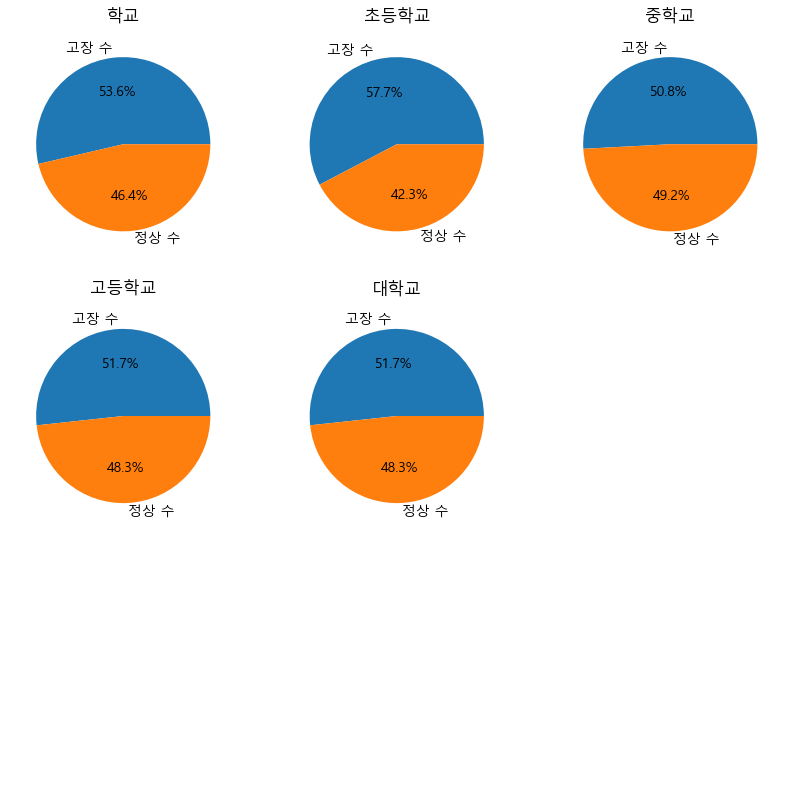

In [88]:
# 데이터프레임으로 변환
df2 = pd.DataFrame(data, columns=['고장 수', '정상 수', '이름'])

# 데이터의 개수를 기반으로 그리드 크기 결정
grid_size = ceil(sqrt(len(df2)))

# 파이차트 그리기
fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10), subplot_kw=dict(aspect="equal"))
axs = axs.ravel()

# 루핑하여 데이터 그리기 및 빈 서브플롯 숨기기
for i in range(grid_size * grid_size):
    if i < len(df2):
        axs[i].pie([df2['고장 수'][i], df2['정상 수'][i]], labels=['고장 수', '정상 수'], autopct='%1.1f%%')
        axs[i].set_title(df2['이름'][i])
        axs[i].set_xlim([-1.3, 1.3])
        axs[i].set_ylim([-1.3, 1.3])
    else:
        axs[i].axis('off')

plt.show()

### 결론 및 해석

**위 결과를 보면, 대여소 명에 초등학교가 들어간 대여소의 고장데이터가 정상데이터에 대해 36.33% 더 많습니다.**

중학교, 고등학교는 큰 차이는 없어보입니다.

아이들이 자신이 빌리거나, 대여소에 있는 자전거들을 아이들이 장난치면서 자전거가 고장이 많은 것 같습니다. 

초등학교가 주변에 있는 대여소는 고장에 특히 더 신경써야 할 것 같습니다.

<br>

## 2. 역 관련

따릉이 대여이력의 대여소명을 조금 살펴보면 역 주변 대여소들이 많습니다. 지하철역 주변 대여소와 고장의 관계가 있지 않을까 예상했습니다.

많이 이용되는 만큼 고장이 많이 날거라고 예상하여 고장데이터가 더 많을 것이라고 생각했습니다.

이용자가 많은 10개의 역을 뽑아 분석했습니다.

In [89]:
data = []

In [90]:
data.append(대여소명에_따른_분할('역'))

'역'의 고장데이터 : 6810개 / '역'의 정상데이터 : 6954개
정상데이터가 고장데이터에 대해 2.11% 더 많습니다.


In [91]:
data.append(대여소명에_따른_분할('출구'))

'출구'의 고장데이터 : 5993개 / '출구'의 정상데이터 : 6117개
정상데이터가 고장데이터에 대해 2.07% 더 많습니다.


In [92]:
data.append(대여소명에_따른_분할('홍대입구역'))

'홍대입구역'의 고장데이터 : 118개 / '홍대입구역'의 정상데이터 : 70개
고장데이터가 정상데이터에 대해 68.57% 더 많습니다.


In [93]:
data.append(대여소명에_따른_분할('성수역'))

'성수역'의 고장데이터 : 78개 / '성수역'의 정상데이터 : 55개
고장데이터가 정상데이터에 대해 41.82% 더 많습니다.


In [94]:
data.append(대여소명에_따른_분할('신도림역'))

'신도림역'의 고장데이터 : 78개 / '신도림역'의 정상데이터 : 64개
고장데이터가 정상데이터에 대해 21.88% 더 많습니다.


In [95]:
data.append(대여소명에_따른_분할('영등포역'))

'영등포역'의 고장데이터 : 56개 / '영등포역'의 정상데이터 : 47개
고장데이터가 정상데이터에 대해 19.15% 더 많습니다.


In [96]:
data.append(대여소명에_따른_분할('구로디지털단지역'))

'구로디지털단지역'의 고장데이터 : 81개 / '구로디지털단지역'의 정상데이터 : 68개
고장데이터가 정상데이터에 대해 19.12% 더 많습니다.


In [97]:
data.append(대여소명에_따른_분할('시청역'))

'시청역'의 고장데이터 : 48개 / '시청역'의 정상데이터 : 56개
정상데이터가 고장데이터에 대해 16.67% 더 많습니다.


In [98]:
data.append(대여소명에_따른_분할('이수역'))

'이수역'의 고장데이터 : 73개 / '이수역'의 정상데이터 : 90개
정상데이터가 고장데이터에 대해 23.29% 더 많습니다.


In [99]:
data.append(대여소명에_따른_분할('건대입구역'))

'건대입구역'의 고장데이터 : 43개 / '건대입구역'의 정상데이터 : 62개
정상데이터가 고장데이터에 대해 44.19% 더 많습니다.


In [100]:
data.append(대여소명에_따른_분할('서울역'))

'서울역'의 고장데이터 : 91개 / '서울역'의 정상데이터 : 163개
정상데이터가 고장데이터에 대해 79.12% 더 많습니다.


In [101]:
data.append(대여소명에_따른_분할('용산역'))

'용산역'의 고장데이터 : 55개 / '용산역'의 정상데이터 : 109개
정상데이터가 고장데이터에 대해 98.18% 더 많습니다.


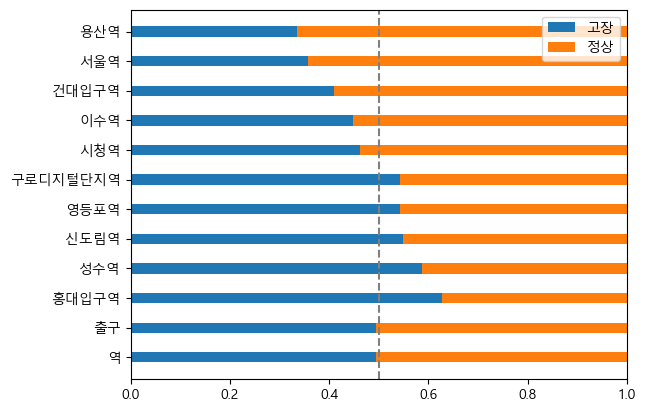

In [102]:


# 각 데이터 리스트에서 고장 수와 정상 수를 추출
values1 = [x[0] for x in data]
values2 = [x[1] for x in data]
labels = [x[2] for x in data]

# '고장 수'와 '정상 수' 합치기
total = [i + j for i, j in zip(values1, values2)]

# 비율 구하기
values1 = [x / y for x, y in zip(values1, total)]
values2 = [x / y for x, y in zip(values2, total)]
total = [1 for _ in range(len(data))]  # 모든 Total의 합이 1이 되도록 설정

# 그래프 그리기
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(data))

rects1 = ax.barh(index, values1, bar_width, label='고장')
rects2 = ax.barh(index, values2, bar_width, left=values1, label='정상')

# y-축의 눈금과 라벨을 설정
tick_locations = index
plt.yticks(tick_locations, labels)

ax.set_xlim([0, 1])  # x-축의 범위를 0~1로 지정
ax.axvline(x=0.5, linestyle='--', color='gray') # x 값이 0.5인 위치에 점선 추가
ax.legend()

plt.show()


### 결과 및 해석

`출구`와 `역`이 들어간 대여소는 고장과 정상이 고르게 있는 편입니다.

**하지만, 개별 역에 대해서는 편차가 꽤 있는 것을 볼 수 있습니다.**

개별 역마다 고장을 유발하거나 고장을 줄이는 숨은 변수가 있어보입니다.

<br>

## 3. 기타

학교와 역 외에 대여소명에서 많이 보이는 단어들로 분석해보았습니다.

In [103]:
data = []

In [104]:
data.append(대여소명에_따른_분할('한강'))

'한강'의 고장데이터 : 168개 / '한강'의 정상데이터 : 143개
고장데이터가 정상데이터에 대해 17.48% 더 많습니다.


In [105]:
data.append(대여소명에_따른_분할('병원'))

'병원'의 고장데이터 : 364개 / '병원'의 정상데이터 : 312개
고장데이터가 정상데이터에 대해 16.67% 더 많습니다.


In [106]:
data.append(대여소명에_따른_분할('경찰'))

'경찰'의 고장데이터 : 200개 / '경찰'의 정상데이터 : 173개
고장데이터가 정상데이터에 대해 15.61% 더 많습니다.


In [107]:
data.append(대여소명에_따른_분할('교회'))

'교회'의 고장데이터 : 162개 / '교회'의 정상데이터 : 146개
고장데이터가 정상데이터에 대해 10.96% 더 많습니다.


In [108]:
data.append(대여소명에_따른_분할('버스'))

'버스'의 고장데이터 : 859개 / '버스'의 정상데이터 : 778개
고장데이터가 정상데이터에 대해 10.41% 더 많습니다.


In [109]:
data.append(대여소명에_따른_분할('광장'))

'광장'의 고장데이터 : 111개 / '광장'의 정상데이터 : 142개
정상데이터가 고장데이터에 대해 27.93% 더 많습니다.


In [110]:
data.append(대여소명에_따른_분할('공항'))

'공항'의 고장데이터 : 62개 / '공항'의 정상데이터 : 85개
정상데이터가 고장데이터에 대해 37.10% 더 많습니다.


In [111]:
data.append(대여소명에_따른_분할('광화문'))

'광화문'의 고장데이터 : 88개 / '광화문'의 정상데이터 : 198개
정상데이터가 고장데이터에 대해 125.00% 더 많습니다.


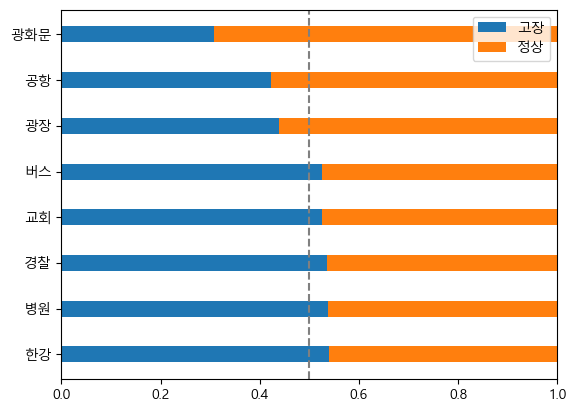

In [112]:
# 각 데이터 리스트에서 고장 수와 정상 수를 추출
values1 = [x[0] for x in data]
values2 = [x[1] for x in data]
labels = [x[2] for x in data]

# '고장 수'와 '정상 수' 합치기
total = [i + j for i, j in zip(values1, values2)]

# 비율 구하기
values1 = [x / y for x, y in zip(values1, total)]
values2 = [x / y for x, y in zip(values2, total)]
total = [1 for _ in range(len(data))]  # 모든 Total의 합이 1이 되도록 설정

# 그래프 그리기
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(data))

rects1 = ax.barh(index, values1, bar_width, label='고장')
rects2 = ax.barh(index, values2, bar_width, left=values1, label='정상')

# y-축의 눈금과 라벨을 설정
tick_locations = index
plt.yticks(tick_locations, labels)

ax.set_xlim([0, 1])  # x-축의 범위를 0~1로 지정
ax.axvline(x=0.5, linestyle='--', color='gray') # x 값이 0.5인 위치에 점선 추가
ax.legend()

plt.show()

### 결과 및 해석

교회, 경찰서, 병원등의 기관이나 버스, 한강은 고장이 좀 더 많은 것으로 나타났습니다.

**그런데, 광화문, 광장, 공항은 정상데이터가 더 많습니다. 특히 광화문은 정상데이터가 압도적입니다.**

이 결과로부터 유추해볼수 있는 사실은 사람들이 많이 몰리는 곳은 의외로 고장이 적다는 것 같습니다. 예상과는 반대입니다.

<br>
<br>

## 대여소명과 고장의 연관성 분석 결론

흥미롭게도 분석하기 전 예상과는 조금 다른 결과들을 볼 수 있었습니다. 고장과 관련된 숨은 변수들이 많은 것 같습니다.